In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (8, 6) # set default figure size, 8in by 6in

This week, you will be learning about the support vector machine (SVM) algorithm. SVMs are considered by many to be the most powerful 'black box' learning algorithm, and by posing a cleverly-chosen optimization objective, one of the most widely used learning algorithms today.

# Video W7 01: Optimziation Objective

[YouTube Video Link](https://www.youtube.com/watch?v=r3uBEDCqIN0&list=PLZ9qNFMHZ-A4rycgrgOYma6zxF4BZGGPW&index=71)


One way of understanding SVM is that it is a simple modification of logistic regression (just as the logistic regression is
a simple extension of linear regression, and neural networks are a way of extending the concepts of logistic regression, etc.)

Recall that the basic modification we made for logistic regression was to pass our hypothesis through a logistic (or sigmoid)
function.  This caused the output from our hypothesis to always be bound to a value in the range from 0.0 to 1.0

$$
h_{\theta}(x) = \frac{1}{1 + e^{-\theta^T x}}
$$

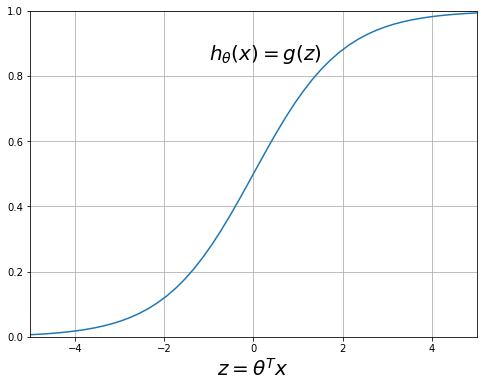

In [2]:
def sigmoid(z):
    return 1.0 / (1.0 + np.e**-z)

plt.figure()
x = np.linspace(-5.0, 5.0)
z = sigmoid(x)
plt.plot(x, z)
plt.axis([-5, 5, 0, 1])
plt.grid()
plt.xlabel('$z = \\theta^Tx$', fontsize=20)
plt.text(-1, 0.85, '$h_{\\theta}(x) = g(z)$', fontsize=20)

Recall that for a single input/output pair $(x, y)$, the objective or cost function for logistic regression has the following form:

$$
-y \;\; \textrm{log} \frac{1}{1 + e^{-\theta^T x}} - (1 - y) \;\; \textrm{log} \; \big(1 - \frac{1}{1 + e^{-\theta^T x}}\big)
$$

This expression will only involve either the left or right side, depending on whether $y = 1$ or $y = 0$ (recall that in logistic
regression, we are performming a classification, where each training example is either in the class, or it is not in the class).
So for example, if we want $y = 1$, then we want $\theta^Tx \gg 0$.  The curve for the function when $y = 1$ looks like the
following:

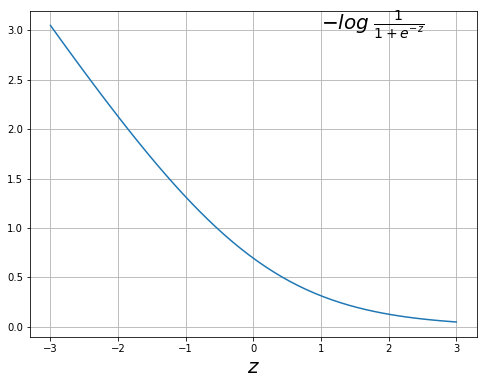

In [3]:
z = np.linspace(-3.0, 3.0)
y = -np.log( 1.0 / (1.0 + np.exp(-z)) )

plt.figure()
plt.plot(z, y)
plt.xlabel('$z$', fontsize=20)
plt.grid()
plt.text(1, 3, u'$-log \\; \\frac{1}{1 + e^{-z}}$', fontsize=20)

Likewise, for the case where $y = 0$ then we want $\theta^T x \ll 0$.  The curve for the objective function when $y = 0$ similarly
looks like the following:

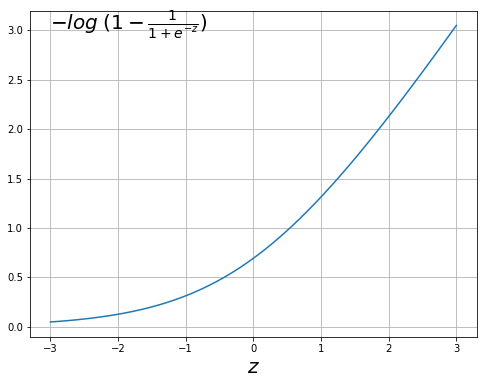

In [4]:
z = np.linspace(-3.0, 3.0)
y = -np.log( 1.0 - (1.0 / (1.0 + np.exp(-z))) )

plt.figure()
plt.plot(z, y)
plt.xlabel('$z$', fontsize=20)
plt.grid()
plt.text(-3, 3, u'$-log \\; ( 1 - \\frac{1}{1 + e^{-z}} )$', fontsize=20)

The full cost function we were trying to minimize, then, for logistic regression was:

$$
\frac{1}{m} \big[ \sum_{i=1}^{m} y^{(i)} \big( - \textrm{log} \; h_{\theta}(x^{(i)} \big) +  
(1 - y^{(i)}) \big( - \textrm{log} \; (1 - h_{\theta}(x^{(i)})) \big) \big] + \frac{\lambda}{2m} \sum_{j=1}^{n} \theta_j^2
$$

For the support vector machine, we change the terms relating to the hypothesis to functions $\textrm{cost}_1$ and
$\textrm{cost}_0$:

$$
\frac{1}{m} \big[ \sum_{i=1}^{m} y^{(i)} \; \textrm{cost}_1( \theta^{T} x^{(i)} )
+ (1 - y^{(i)}) \; \textrm{cost}_0 ( \theta^{T} x^{(i)} ) \big] 
+ \frac{\lambda}{2m} \sum_{j=1}^{n} \theta_j^2
$$

as described in the video, by convention in SVM we remove the division by $m$ and we parameterize the regularization and cost
terms a bit differently.  Usually you will see the objective function for SVM specified in this slightly different but equivalent
form:

$$
\underset{\theta}{\textrm{min}} \; C
\sum_{i=1}^{m} \big[ y^{(i)} \; \textrm{cost}_1( \theta^{T} x^{(i)} )
+ (1 - y^{(i)}) \; \textrm{cost}_0 ( \theta^{T} x^{(i)} ) \big]
+ \frac{1}{2} \sum_{j=1}^{n} \theta_j^2
$$


In this formulation of the objective function, the term C is being used as the regularization parameter.  But now, the larger
the value of C, the more emphasis that is placed on the cost terms (and the less that is placed on the regularization terms.

# Video W7 02: Large Margin Intuition

[YouTube Video Link](https://www.youtube.com/watch?v=yjH3ZSPqLhU&list=PLZ9qNFMHZ-A4rycgrgOYma6zxF4BZGGPW&index=72)

Because of the form of the $\textrm{cost}_0$ and $\textrm{cost}_1$ functions (which we haven't specified yet), these
naturally favor cost functions that give wide margins between the hypothesis outputs for $y=0$ and $y=1$.

Intiutively, as shown in the video, the objective function that we have defined will find decision boundaries that maximize
the margin between the negative and positive examples.  This is where the name large margin classifier comes from.  The
term `support vector` from the name for SVM also refers to the mathematical properties of these objective functions that
try and maximize this margin between positive and negative examples.  

The $cost_0$ and $cost_1$ functions described in the video are basically the same idea of using
what are known as rectified linear units (ReLU) in neural network.  Here we give a linear
activation response when the value is above (or below) some threshold, and 0 otherwise.

The following figures compare a possible implementation of the discussed $cost_0$ and $cost_1$ functions
to this type of threshold RELU activation function.

In [5]:
def cost_0(z):
    return np.where(z > -1, z+1, 0)
    
def cost_1(z):
    return np.where(z < 1, -z+1, 0)

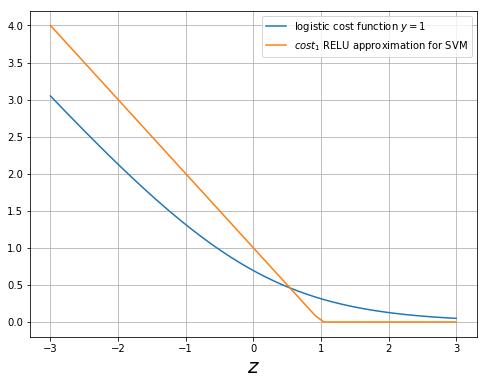

In [6]:
z = np.linspace(-3.0, 3.0)
y = -np.log( 1.0 / (1.0 + np.exp(-z)) )

# logistic cost function, for y=1
plt.figure()
plt.plot(z, y, label='logistic cost function $y=1$')
plt.xlabel('$z$', fontsize=20)
plt.grid()

# cost_1 function, RELU like
y = cost_1(z)
plt.plot(z, y, label='$cost_1$ RELU approximation for SVM')
plt.legend()

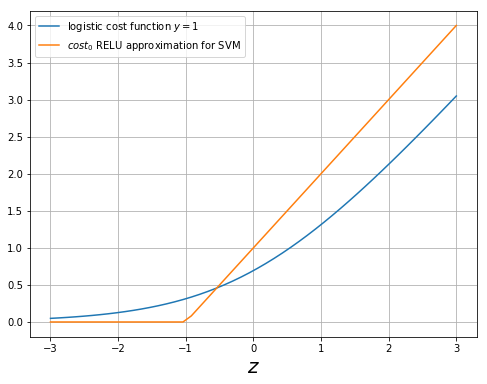

In [7]:
z = np.linspace(-3.0, 3.0)
y = -np.log( 1.0 - (1.0 / (1.0 + np.exp(-z))) )

# logistic cost function, for y=1
plt.figure()
plt.plot(z, y, label='logistic cost function $y=1$')
plt.xlabel('$z$', fontsize=20)
plt.grid()

# cost_1 function, RELU like
y = cost_0(z)
plt.plot(z, y, label='$cost_0$ RELU approximation for SVM')
plt.legend()

# Video W7 03: Mathematics Behind Large Margin Intuition (Optional)

[YouTube Video Link](https://www.youtube.com/watch?v=Jm49m7ey34o&list=PLZ9qNFMHZ-A4rycgrgOYma6zxF4BZGGPW&index=73)

The nitty gritty of the mathematics behind how the SVM optimization finds large margin decision boundaries is not necessary
for using SVM well.  But at least watch the video to get a bit of a feel for what happens behind the scenes when creating an SVM
and how it finds such decision boundaries given our definition of the cost function.

# Video W7 04: Kernels I

[YouTube Video Link](https://www.youtube.com/watch?v=0Fg2U6LN3pg&list=PLZ9qNFMHZ-A4rycgrgOYma6zxF4BZGGPW&index=74)

This video starts by giving a good explanation of what are known as gaussian feature kernels.  When we looked at logistic
regression, we did examine using nonlinear features to produce more complex decision boundaries.  Kernel methods, used
most commonly with SVM systems, allow us to create sets of nonlinear features, but in a more directed and less random way
than simply using polynomial combinations of basic features.

The [gaussian function](https://en.wikipedia.org/wiki/Gaussian_function) discussed in the video is related to gaussian
or normal distributions that you may be familiar with (e.g. the standard 'bell curve' distribution).  For a single
feature, the gaussian function is usually specified in terms of $\mu$, the mean or location of the feature, and 
$\sigma^2$ the square of the deviation of the feature.  So for example, as given in the video, we can think of
the similarity measure for a system that has a single feature, with a landmar at the point $\mu = 0$ as follows:

$$
f(x) = exp(- \frac{(x - \mu)^2}{2\sigma^2})
$$

The expression $(x - \mu)^2$ is really just an expression of the distance from some input $x$ to the landmark.  So when
when we only have a single feature, and our landmark is at the origin point 0 (e.g. $\mu = 0$) then we have:

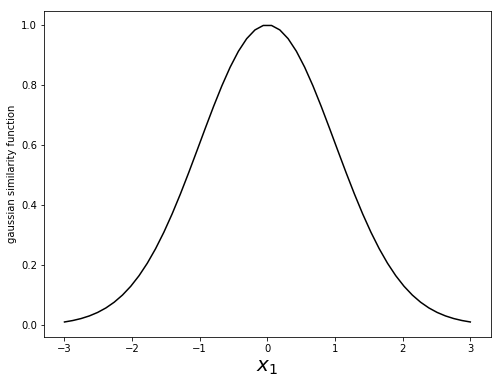

In [8]:
def gauss(x, mu, sigma):
    return np.exp(- (x - mu)**2.0 / (2 * sigma**2.0))

x = np.linspace(-3.0, 3.0)
plt.figure()
plt.plot(x, gauss(x, 0.0, 1.0), 'k-')
plt.xlabel('$x_1$', fontsize=20)
plt.ylabel('gaussian similarity function')

This is the basic gaussian distribution, with a mean of 0 and a standard deviation of 1.  In the context of a gaussian kernel 
function, we will return a similarity of 1.0 for any feature that is exactly the same as our landmark ($\mu$ or 0 in this case),
and we will return lesser values, eventually approaching 0, as we get a further distance from the landmark $\mu$ location of 0.

In the videos, the linear algebra norm simply calculates the distance from an input $x$ when we have more than 1 feature. So for
example, when we have 2 features, or 2 dimensional space, we need to visualize the gaussian function using a 3 dimensional plot, 
where we plot our two features $x_1$ and $x_2$ on two orthogonal axis, and plot the gaussian function on the 3rd orthogonal
z axis.

So for example, as shown in the video, if we have 2 features, and our landmark is located at the position where $x_1 = 3$
and $x_2 = 5$, e.g. 
$$
l^{(1)} =
\begin{bmatrix}
3 \\
5 \\
\end{bmatrix}
$$
We will simply have a gaussian function in 2 dimensions (features) that has a value of 1.0 exactly at that $\mu$ location (in
2 dimensions), and falls away in the bell curve shape in both dimensions as a function of the $\sigma$ (the deviation value).
So the gaussian similiarity function written in the video is:

$$
f_1 = \mathrm{exp} \Big(- \frac{ \|x - l^{(1)}\|^2 }{2 \sigma^2} \Big)
$$

The top part of the fraction is simply calculating the distance between some point $x$ and the landmark location in a 2 or higher
dimensional space (e.g. the sum of all of the differences for each individual dimension, then squaring this sum, in 
linear algebra this is simply the square of the norm of the difference of these two vectors).  So for a two dimensional feature, the gaussian function can
be plotted on a 3D plot in python as follows:

In [9]:
# first plot as a contour map

def gauss(x, mu, sigma):
    """A multi-dimensional version of the gaussian function.  x and mu are n dimensional feature vectors, so
    we take the linear algebra norm of the difference and square this)."""
    from numpy.linalg import norm
    return np.exp(- norm(x - mu, axis=1)**2.0 / (2 * sigma**2.0))

# the landmark, I have been calling it mu
mu = np.array([3, 5])
sigma = 1.0

# we create a mesh so we can plot our gaussin function in 3d
x1_min, x1_max = -2.0, 8.0
x2_min, x2_max = 0.0, 10.0
h = 0.02  # step size in the mesh
x1, x2 = np.meshgrid(np.arange(x1_min, x1_max, h),
                     np.arange(x2_min, x2_max, h))

x = np.c_[x1.ravel(), x2.ravel()]
Z = gauss(x, mu, sigma)
Z = Z.reshape(x1.shape)


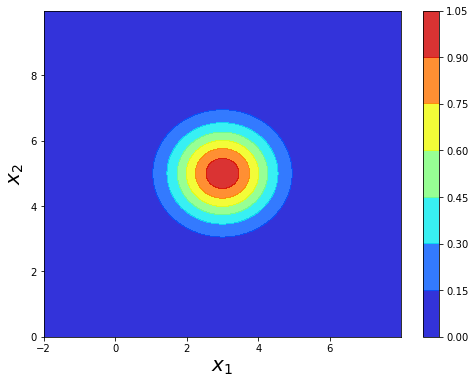

In [10]:
# plot the 2 feature dimensional gaussian as a contour map
plt.contourf(x1, x2, Z, cmap=plt.cm.jet, alpha=0.8)
plt.colorbar()
plt.xlabel('$x_1$', fontsize=20)
plt.ylabel('$x_2$', fontsize=20)

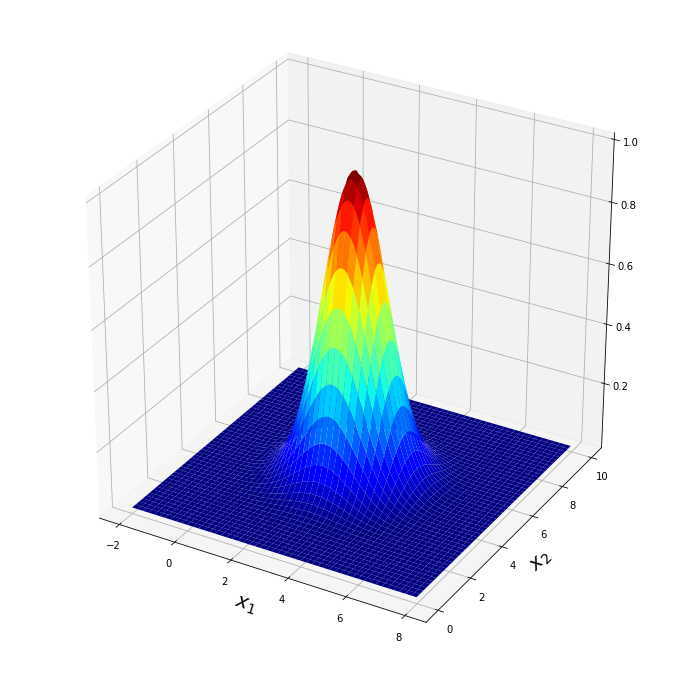

In [11]:
# now plot as as a 3D surface plot
from mpl_toolkits.mplot3d import Axes3D

Z = Z.reshape(x1.shape)
fig = plt.figure(figsize=(12,12))
ax = fig.gca(projection='3d')
surf = ax.plot_surface(x1, x2, Z, cmap=plt.cm.jet)
ax.set_xlabel('$x_1$', fontsize=20)
ax.set_ylabel('$x_2$', fontsize=20)

You should try changing the landmark location $\mu$ and the sigma value (which controls how fast the change in distance affects
the value of the gaussian function) in the previous cell.

As shown in the video (closer to the end), gaussian kernels allow for nonlinear decision boundaries.  But unlike creating
an (exponential) combination of polynomial fetures, we can simply pick an appropriate number of gausian kernels that will
likely produce a good enough decision boundary for our given set of data.  As discussed in this video, a good way 
of thinking of the gaussian kernels is as landmarks that are chosen (we discuss how to choose the landmarks in the next video)
and features are then simply similarity measures to the chosen set of landmarks.

# Video W7 05: Kernels II

[YouTube Video Link](https://www.youtube.com/watch?v=P9Xjvr2JfOk&index=75&list=PLZ9qNFMHZ-A4rycgrgOYma6zxF4BZGGPW)

In practice, landmarks for gaussian kernels are chosen by putting landmarks at each of the training example locations.
Thus the number of landmarks will grow linearly with the size of our training set data (instead of being a combinatorial
explosion in terms of the number of input features, as creating polynomial terms from the features tends to do).

# Video W7 06: Using an SVM

[YouTube Video Link](https://www.youtube.com/watch?v=wtno4WSDTlY&list=PLZ9qNFMHZ-A4rycgrgOYma6zxF4BZGGPW&index=76)


This video shows using SVM packages for octave/matlab.  In this class we have been using Python, of course.  There are many good
implementations of SVM in Python.  For example, the libsvm mentioned in the video is actually a language neutral implementation
of svm, and there are extensions available to use libsvm in python:
[libsvm](https://www.csie.ntu.edu.tw/~cjlin/libsvm/)

As of the creation of this notebook, however (Fall 2015), I do recommend using the svm implementation
in the scikit learn library.  It is the most mature and has the best (most consistent) user interface.  You will have to install
scikit learn in your environment in order to  use it.  If you are using the enthought Python environemnt, it should have been
installed for you.  The documentation for the scikit learn svm library is [here](http://scikit-learn.org/stable/modules/svm.html).

As discussed in this video, sometimes we want to do an SVM classification, but not ues any complex kernels, e.g. a
straightforward linear SVM classifier.  If you want to do this, you should use the `SVC` in scikit learn with a linear kernel to
do a linear SVM classifier.  For example, recall that in assignment 03 we used logistic regression to classify
exam score data (with a single class, admit or not admit) using a linear decision boundary.  The data looked like this:

(100, 2)
(100,)
100


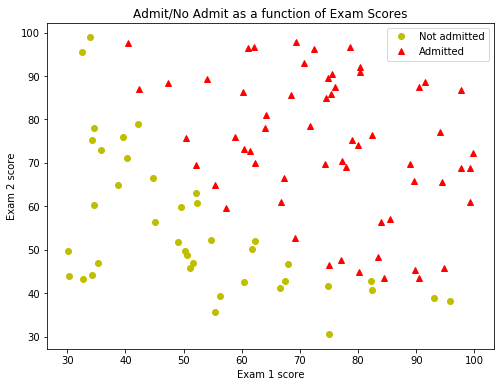

In [12]:
data = pd.read_csv('../assignments/data/assg-03-data.csv', names=['exam1', 'exam2', 'admitted'])
x = data[['exam1', 'exam2']].as_matrix()
y = data.admitted.as_matrix()
m = y.size

print(x.shape)
print(y.shape)
print(m)
X = np.ones( (3, m) )
X[1:,:] = x.T # the second column contains the raw inputs
X = X.T

neg_indexes = np.where(y==0)[0]
pos_indexes = np.where(y==1)[0]
plt.plot(x[neg_indexes, 0], x[neg_indexes, 1], 'yo', label='Not admitted')
plt.plot(x[pos_indexes, 0], x[pos_indexes, 1], 'r^', label='Admitted')
plt.title('Admit/No Admit as a function of Exam Scores')
plt.xlabel('Exam 1 score')
plt.ylabel('Exam 2 score')
plt.legend()

Before we do a linear SVM, lets use the logistic regression functions from scikit learn to perform a logistic regression.  The
scikit learn uses C rather than the $\lambda$ to specify the amount of regularization.  In our assignment we didn't use any regularization.  We can get similar theta parameters by using a large C, which will do the optimization using only the cost, without
much weight for the regularization.  But try it with more regularization (e.g. smaller C values), and you will see that the 
decision boundary is still basically the same.

In [13]:
from sklearn import linear_model
logreg = linear_model.LogisticRegression(C=1e6)
logreg.fit(x, y)
print(logreg.coef_) # show the coefficients that were fitted to the data by logistic regression
print(logreg.intercept_)

[[ 0.20458394  0.19980387]]
[-24.95527834]


Notice that for scikit learn we don't have to add in the column of 1's to the input data.  By default, most scikit learn functions
will assume they need to add in such an intercept parameter.  So there will only be two theta parameters in this case, but the 
parameter corresponding to the intercept value is in a separate constant after we fit our model to the training data.

Here is a plot of the decision boundary that was found.

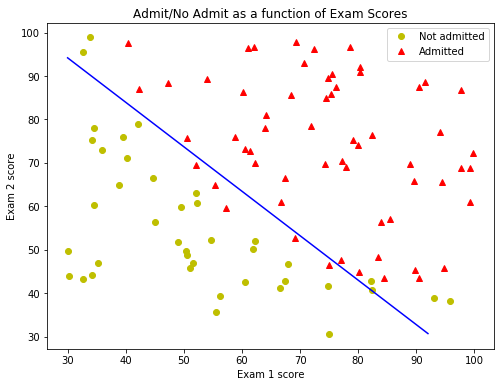

In [14]:
# display the decision boundary for the coeficients
neg_indexes = np.where(y==0)[0]
pos_indexes = np.where(y==1)[0]

# visualize the data points of the two categories
plt.plot(x[neg_indexes, 0], x[neg_indexes, 1], 'yo', label='Not admitted')
plt.plot(x[pos_indexes, 0], x[pos_indexes, 1], 'r^', label='Admitted')
plt.title('Admit/No Admit as a function of Exam Scores')
plt.xlabel('Exam 1 score')
plt.ylabel('Exam 2 score')
plt.legend()

# add the decision boundary line
dec_xpts = np.arange(30, 93)
theta = logreg.coef_[0]
dec_ypts = - (logreg.intercept_ + theta[0] * dec_xpts) / theta[1]
plt.plot(dec_xpts, dec_ypts, 'b-')

Now lets use the linear SVM classifier from scikit learn to perform the same classification.

In [15]:
from sklearn import svm
linclf = svm.SVC(kernel='linear', C=1e6)
linclf.fit(x, y)
print(linclf.coef_)  # show the coefficients that were fitted to the data by logistic regression
print(linclf.intercept_)

[[ 64.17436109  67.1465802 ]]
[-8028.53017612]


Notice that the parameters found for the model andthe intercept are a bit different, but these do actually correspond to basically
about the same decision boundary as before.  If we plot it you can see this is the case:

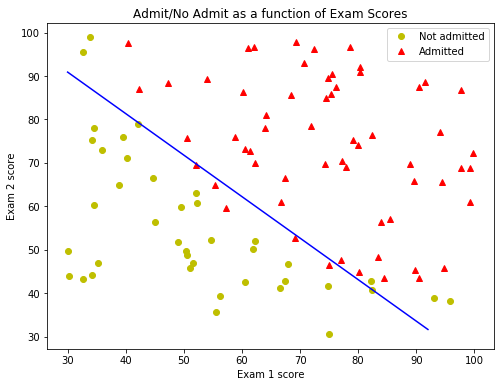

In [16]:
# display the decision boundary for the coeficients
neg_indexes = np.where(y==0)[0]
pos_indexes = np.where(y==1)[0]

# visualize the data points of the two categories
plt.plot(x[neg_indexes, 0], x[neg_indexes, 1], 'yo', label='Not admitted')
plt.plot(x[pos_indexes, 0], x[pos_indexes, 1], 'r^', label='Admitted')
plt.title('Admit/No Admit as a function of Exam Scores')
plt.xlabel('Exam 1 score')
plt.ylabel('Exam 2 score')
plt.legend()

# add the decision boundary line
dec_xpts = np.arange(30, 93)
theta = linclf.coef_[0]
dec_ypts = - (linclf.intercept_ + theta[0] * dec_xpts) / theta[1]
plt.plot(dec_xpts, dec_ypts, 'b-')

And finally, lets use an SVM with a gaussian kernel. It is not so interesting to use a nonlinear classifier with the
previous data, so lets make up some data, similar to the data shown in our companion video
of a class surrounded by another class.  Here we use a function from the scikit learn library that can beused to creat data
at random.  The data has 2 features, and only 2 classes (either positivie or negative, e.g. admitted or not
admitted).  The random data generated from this function is centered at the origin (0, 0).  The further away the data is from
the center, the more probable it is in another class (using a gaussian probability function).  Thus with two classes we tend to get
a class inside surrounded by another class, with a basically circular decision boundary.

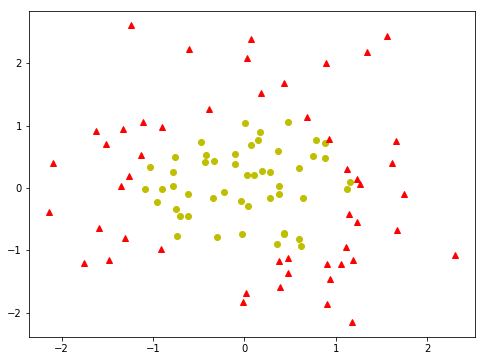

In [17]:
from sklearn.datasets import make_gaussian_quantiles
X, Y = make_gaussian_quantiles(n_features=2, n_classes=2)

neg_indexes = np.where(Y==0)[0]
pos_indexes = np.where(Y==1)[0]
plt.plot(X[neg_indexes, 0], X[neg_indexes, 1], 'yo', label='negative examples')
plt.plot(X[pos_indexes, 0], X[pos_indexes, 1], 'r^', label='positive examples')


Here then we will use a SVM with gaussian kernels to create a classifier for the data.  Note that we specify 'rbf' for the
kernel, these are radial basis functions kernels.  Radial basis function kernels include 
gaussian functions, as well as the polynomial functions
discussed in our companion videos. You specify the gamma, degree and coef0 parameters to get the different types of kernel 
functions that were discussed.  I believe that by specifying a gamma of 1.0 we will be using simple gaussian kernel functions as
were shown in our videos.

In [18]:
from sklearn import svm
rbfclf = svm.SVC(kernel='rbf', gamma=1.0)
rbfclf.fit(X, Y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma=1.0, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

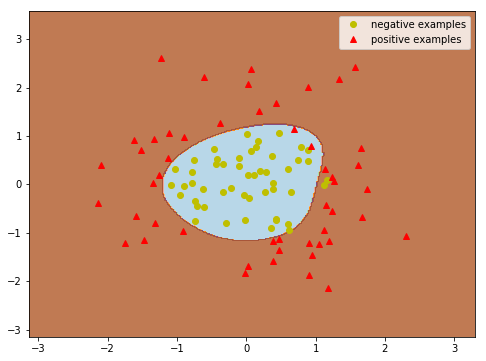

In [19]:
# Now display the results.  We don't really have simple theta parameters anymore, the parameters are specifying
# relative values of the gaussian kernels now.  In fact, rbclf.coef_ will not be defined for non linear kernels.
# Here we use an alternative method to visualize the decision boundary that was discovered.

# create a mesh to plot in
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
h = .02  # step size in the mesh
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

Z = rbfclf.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)

# plot the original data
neg_indexes = np.where(Y==0)[0]
pos_indexes = np.where(Y==1)[0]
plt.plot(X[neg_indexes, 0], X[neg_indexes, 1], 'yo', label='negative examples')
plt.plot(X[pos_indexes, 0], X[pos_indexes, 1], 'r^', label='positive examples')
plt.legend()